<a href="https://colab.research.google.com/github/amirrhseiin/Voice-Semantic-Detection/blob/main/simple_with_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip 'drive/MyDrive/project4-part2/train.zip'
!unzip 'drive/MyDrive/project4-part2/test.zip'

unzip:  cannot find or open drive/MyDrive/project4-part2/train.zip, drive/MyDrive/project4-part2/train.zip.zip or drive/MyDrive/project4-part2/train.zip.ZIP.
Archive:  drive/MyDrive/project4-part2/test.zip
   creating: test/
  inflating: test/2705F.wav          
  inflating: test/2707M.wav          
  inflating: test/2708F.wav          
  inflating: test/2710M.wav          
  inflating: test/2711M.wav          
  inflating: test/2712M.wav          
  inflating: test/2713M.wav          
  inflating: test/2714M.wav          
  inflating: test/2715M.wav          
  inflating: test/2720F.wav          
  inflating: test/2721M.wav          
  inflating: test/2722F.wav          
  inflating: test/2724F.wav          
  inflating: test/2725M.wav          
  inflating: test/2726M.wav          
  inflating: test/2727F.wav          
  inflating: test/2728M.wav          
  inflating: test/2729F.wav          
  inflating: test/2733M.wav          
  inflating: test/2734F.wav          
  inflating: te

In [ ]:
import glob
from pandas import DataFrame
import pandas as pd
import numpy as np
import librosa
import IPython
from IPython.display import Audio
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras import Model
from keras.models import load_model
from keras.layers import Dense, Dropout, Input , LSTM
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical, plot_model
from keras.callbacks import  EarlyStopping

In [ ]:
import glob

In [ ]:
train_name_list =[]
train_name_list = glob.glob("train/*.wav")
test_name_list =[]
test_name_list = glob.glob("test/*.wav")

In [ ]:
test_label = pd.read_csv('drive/MyDrive/project4-part2/result.csv')

In [ ]:
df = DataFrame (temp ,columns=['Name'])
df

,Name
0,2985F
1,2720F
2,2822F
3,2995M
4,2999M
...,...
222,2947M
223,2817M
224,2989M
225,2903M


In [ ]:
len(train_name_list)

0

In [ ]:
len(test_name_list)

227

In [ ]:
train_label = []
for name in train_name_list:
  train_label.append(name[11:12])

In [ ]:
gender = []
for name in train_name_list:
  gender.append(name[10:11])

In [ ]:
female_test =[]
male_test = []

for name in test_name_list:
  if(name[9:10]=="M"):
    male_test.append(name)
  if(name[9:10]=="F"):
    female_test.append(name)

In [ ]:
male_temp = []
female_temp = []

for i in female_test:
  female_temp.append(i[5:10])
for i in male_test:
  male_temp.append(i[5:10])


In [ ]:
male_df = DataFrame (male_temp ,columns=['Name'])
female_df = DataFrame (female_temp ,columns=['Name'])

In [ ]:
gender = pd.get_dummies(gender)
gender

,F,M
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
1989,0,1
1990,0,1
1991,0,1
1992,0,1


In [ ]:
gender.shape

(1994, 2)

In [ ]:
female_train_label = []
female_train = []

for index in range(len(train_name_list)):
  if gender.F[index]==1:
    female_train.append(train_name_list[index])
    female_train_label.append(train_label[index])

In [ ]:
male_train_label = []
male_train = []

for index in range(len(train_name_list)):
    if gender.M[index]==1:
      male_train.append(train_name_list[index])
      male_train_label.append(train_label[index])

In [ ]:
len(male_train)

1155

In [ ]:
len(female_train)

839

In [ ]:
male_train_label = pd.get_dummies(male_train_label)
male_train_label 

,A,H,N,S,W
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1150,0,0,1,0,0
1151,1,0,0,0,0
1152,0,0,1,0,0
1153,1,0,0,0,0


In [ ]:
female_train_label = pd.get_dummies(female_train_label)
female_train_label

,A,H,N,S,W
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
834,1,0,0,0,0
835,0,0,0,0,1
836,0,0,0,1,0
837,1,0,0,0,0


In [ ]:
def extract_mfcc(file_path):
  y,sr=librosa.load(file_path)
  mfccs=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=36).T,axis=0)
  return mfccs

In [ ]:
def extract_cens(file_path):
  y,sr=librosa.load(file_path)
  cens =np.mean(librosa.feature.chroma_cens(y=y,sr=sr,n_chroma=36).T,axis=0)
  return cens 

In [ ]:
female_sound_feature_mfcc=[]
female_sound_feature_cens=[]
male_sound_feature_mfcc=[]
male_sound_feature_cens=[]

for i in range(len(female_train)):
  female_sound_feature_mfcc.append(extract_mfcc(female_train[i]))
  female_sound_feature_cens.append(extract_cens(female_train[i]))

for i in range(len(male_train)):
  male_sound_feature_mfcc.append(extract_mfcc(male_train[i]))
  male_sound_feature_cens.append(extract_cens(male_train[i]))

In [ ]:
female_mfcc_extracted_features =[]
male_mfcc_extracted_features =[]

for female_mfcc in female_sound_feature_mfcc:
  feature = np.array([female_mfcc]).reshape(36,1)
  female_mfcc_extracted_features.append(feature)

for male_mfcc in male_sound_feature_mfcc:
  feature = np.array([male_mfcc]).reshape(36,1)
  male_mfcc_extracted_features.append(feature)

male_mfcc_extracted_features = np.asarray(male_mfcc_extracted_features)
female_mfcc_extracted_features = np.asarray(female_mfcc_extracted_features)

In [ ]:
female_cens_extracted_features =[]
male_cens_extracted_features =[]

for female_cens in female_sound_feature_cens:
  feature = np.array([female_cens]).reshape(36,1)
  female_cens_extracted_features.append(feature)

for male_cens in male_sound_feature_cens:
  feature = np.array([male_cens]).reshape(36,1)
  male_cens_extracted_features.append(feature)

female_cens_extracted_features = np.asarray(female_cens_extracted_features)
male_cens_extracted_features = np.asarray(male_cens_extracted_features)

In [ ]:
female_all_features = []
for i in range(len(female_mfcc_extracted_features)):
  features=np.array([female_mfcc_extracted_features[i],female_cens_extracted_features[i]]).reshape(36,2)
  female_all_features.append(features)

female_all_features = np.asarray(female_all_features)


In [ ]:
male_all_features = []
for i in range(len(male_mfcc_extracted_features)):
  features=np.array([male_mfcc_extracted_features[i],male_cens_extracted_features[i]]).reshape(36,2)
  male_all_features.append(features)

male_all_features = np.asarray(male_all_features)


In [ ]:
male_test_sound_feature_mfcc=[]
male_test_sound_feature_cens=[]

for name in male_test:
  male_test_sound_feature_mfcc.append(extract_mfcc(name))
  male_test_sound_feature_cens.append(extract_cens(name))

In [ ]:
female_test_sound_feature_mfcc=[]
female_test_sound_feature_cens=[]

for name in female_test:
  female_test_sound_feature_mfcc.append(extract_mfcc(name))
  female_test_sound_feature_cens.append(extract_cens(name))

In [ ]:
male_test_mfcc_extracted_features =[]
female_test_mfcc_extracted_features =[]

for i in range(len(female_test)):
  mfcc = female_test_sound_feature_mfcc[i]
  feature = np.array([mfcc]).reshape(36,1)
  female_test_mfcc_extracted_features.append(feature)

for i in range(len(male_test)):
  mfcc = male_test_sound_feature_mfcc[i]
  feature = np.array([mfcc]).reshape(36,1)
  male_test_mfcc_extracted_features.append(feature)


female_test_mfcc_extracted_features = np.asarray(female_test_mfcc_extracted_features)
male_test_mfcc_extracted_features = np.asarray(male_test_mfcc_extracted_features)


In [ ]:
male_test_cens_extracted_features =[]
female_test_cens_extracted_features =[]

for i in range(len(female_test)):
  cens = female_test_sound_feature_cens[i]
  feature = np.array([cens]).reshape(36,1)
  female_test_cens_extracted_features.append(feature)

for i in range(len(male_test)):
  cens = male_test_sound_feature_cens[i]
  feature = np.array([cens]).reshape(36,1)
  male_test_cens_extracted_features.append(feature)

female_test_cens_extracted_features = np.asarray(female_test_cens_extracted_features)
male_test_cens_extracted_features = np.asarray(male_test_cens_extracted_features)

In [ ]:
male_all_test_features = []
for i in range(len(male_test_mfcc_extracted_features)):
  features=np.array([male_test_mfcc_extracted_features[i],male_test_cens_extracted_features[i]]).reshape(36,2)
  male_all_test_features.append(features)

male_all_test_features = np.asarray(male_all_test_features)


In [ ]:
female_test_all_features = []
for i in range(len(female_test_mfcc_extracted_features)):
  features=np.array([female_test_mfcc_extracted_features[i],female_test_cens_extracted_features[i]]).reshape(36,2)
  female_test_all_features.append(features)

female_test_all_features = np.asarray(female_test_all_features)


model for male

In [ ]:
input_layer = Input(shape=(36,2) ,name='input')
lstm_layer = LSTM(128 ,return_sequences=False)(input_layer)
hidden_layer1 = Dense(32 ,activation='relu' ,name='layer1')(lstm_layer)
hidden_layer2 = Dense(16 ,activation='relu' ,name='layer2')(hidden_layer1)
dropout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(8 ,activation='relu' ,name='layer3')(dropout_layer)
output_layer = Dense(5 ,activation='softmax' ,name='output')(hidden_layer3)


In [ ]:
model_1 = Model( inputs=input_layer, outputs=output_layer ,name='model')
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 36, 2)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               67072     
_________________________________________________________________
layer1 (Dense)               (None, 32)                4128      
_________________________________________________________________
layer2 (Dense)               (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
layer3 (Dense)               (None, 8)                 136       
_________________________________________________________________
output (Dense)               (None, 5)                 45    

In [ ]:
sgd = Adam(lr=0.0001)
model_1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_1.fit(male_all_features ,male_train_label ,epochs=70 ,batch_size=32 ,verbose=1)

Epoch 1/70
37/37 [==============================] - 3s 34ms/step - loss: 1.6086 - accuracy: 0.2118
Epoch 2/70
37/37 [==============================] - 1s 34ms/step - loss: 1.5990 - accuracy: 0.3828
Epoch 3/70
37/37 [==============================] - 1s 34ms/step - loss: 1.5762 - accuracy: 0.3914
Epoch 4/70
37/37 [==============================] - 1s 38ms/step - loss: 1.4923 - accuracy: 0.4169
Epoch 5/70
37/37 [==============================] - 1s 34ms/step - loss: 1.4321 - accuracy: 0.4435
Epoch 6/70
37/37 [==============================] - 1s 34ms/step - loss: 1.3256 - accuracy: 0.4870
Epoch 7/70
37/37 [==============================] - 1s 34ms/step - loss: 1.2910 - accuracy: 0.5417
Epoch 8/70
37/37 [==============================] - 1s 34ms/step - loss: 1.3035 - accuracy: 0.5110
Epoch 9/70
37/37 [==============================] - 1s 34ms/step - loss: 1.2502 - accuracy: 0.5397
Epoch 10/70
37/37 [==============================] - 1s 35ms/step - loss: 1.2154 - accuracy: 0.5732
Epoch 11/

In [ ]:
model.save_weights('male_weights_3.h5') 
model.save('male_model_3.h5')   

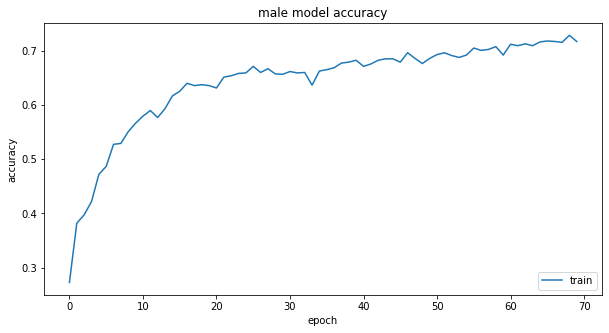

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('male model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

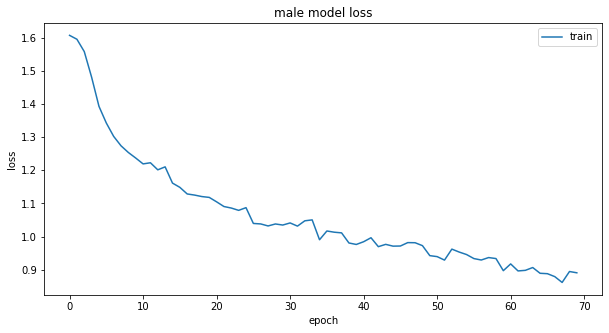

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('male model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
male_predicted = model_1.predict(male_all_test_features)
male_predicted

array([[3.39004844e-02, 2.90655065e-02, 8.83799434e-01, 4.18094844e-02,
        1.14250481e-02],
       [2.16220953e-02, 2.06940193e-02, 9.21190560e-01, 2.95504779e-02,
        6.94277650e-03],
       [1.12348028e-01, 9.60794240e-02, 6.02532029e-01, 1.22627616e-01,
        6.64129108e-02],
       [1.60970390e-01, 8.47566724e-02, 5.72415233e-01, 1.18260540e-01,
        6.35971427e-02],
       [1.92827374e-01, 1.65694654e-01, 2.68936813e-01, 1.94121853e-01,
        1.78419188e-01],
       [7.78438032e-01, 4.94117066e-02, 1.08436920e-01, 5.49678542e-02,
        8.74537602e-03],
       [2.76190490e-01, 8.58487263e-02, 4.76485044e-01, 1.09538369e-01,
        5.19373566e-02],
       [2.57098172e-02, 2.41082590e-02, 9.07165945e-01, 3.43852602e-02,
        8.63075443e-03],
       [2.15507690e-02, 2.06025243e-02, 9.21488047e-01, 2.94616427e-02,
        6.89699408e-03],
       [5.43442257e-02, 4.10602838e-02, 8.26725483e-01, 5.85198998e-02,
        1.93501208e-02],
       [9.56432760e-01, 6.2767

In [ ]:
male_predicted = np.argmax(male_predicted, axis=1)

In [ ]:
male_predicted

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 3, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 2])

model for female

In [ ]:
input_layer = Input(shape=(36,2) ,name='input')
lstm_layer = LSTM(128 ,return_sequences=False)(input_layer)
hidden_layer1 = Dense(32 ,activation='relu' ,name='layer1')(lstm_layer)
hidden_layer2 = Dense(16 ,activation='relu' ,name='layer2')(hidden_layer1)
dropout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(8 ,activation='relu' ,name='layer3')(dropout_layer)
output_layer = Dense(5 ,activation='softmax' ,name='output')(hidden_layer3)


In [ ]:
model_2 = Model( inputs=input_layer, outputs=output_layer ,name='model')
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 36, 2)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               67072     
_________________________________________________________________
layer1 (Dense)               (None, 32)                4128      
_________________________________________________________________
layer2 (Dense)               (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
layer3 (Dense)               (None, 8)                 136       
_________________________________________________________________
output (Dense)               (None, 5)                 45    

In [ ]:
sgd = Adam(lr=0.0001)
model_2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_2.fit(female_all_features ,female_train_label ,epochs=70 ,batch_size=32 ,verbose=1)

Epoch 1/70
27/27 [==============================] - 3s 34ms/step - loss: 1.6084 - accuracy: 0.2505
Epoch 2/70
27/27 [==============================] - 1s 34ms/step - loss: 1.6029 - accuracy: 0.3439
Epoch 3/70
27/27 [==============================] - 1s 33ms/step - loss: 1.5885 - accuracy: 0.3783
Epoch 4/70
27/27 [==============================] - 1s 33ms/step - loss: 1.5578 - accuracy: 0.4306
Epoch 5/70
27/27 [==============================] - 1s 33ms/step - loss: 1.5245 - accuracy: 0.4584
Epoch 6/70
27/27 [==============================] - 1s 33ms/step - loss: 1.5188 - accuracy: 0.4461
Epoch 7/70
27/27 [==============================] - 1s 34ms/step - loss: 1.5168 - accuracy: 0.4415
Epoch 8/70
27/27 [==============================] - 1s 34ms/step - loss: 1.4660 - accuracy: 0.4791
Epoch 9/70
27/27 [==============================] - 1s 33ms/step - loss: 1.4392 - accuracy: 0.4640
Epoch 10/70
27/27 [==============================] - 1s 34ms/step - loss: 1.4268 - accuracy: 0.4577
Epoch 11/

In [ ]:
model_2.save_weights('female_weights_3.h5') 
model_2.save('female_model_3.h5')   

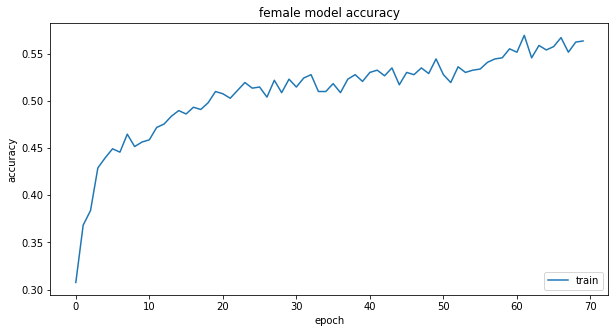

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('female model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

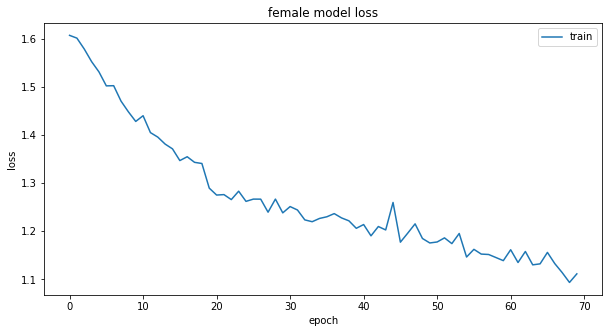

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('female model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
female_predicted = model_2.predict(female_test_all_features)
female_predicted

array([[1.16225118e-02, 7.84261501e-04, 8.98562372e-01, 7.86696002e-02,
        1.03612002e-02],
       [3.31282645e-01, 1.50506616e-01, 1.26925915e-01, 2.17106625e-01,
        1.74178198e-01],
       [9.21080887e-01, 1.47613399e-02, 1.75712910e-03, 4.10247631e-02,
        2.13757511e-02],
       [2.40773812e-01, 1.50162667e-01, 1.73496395e-01, 2.44367719e-01,
        1.91199422e-01],
       [2.07804114e-01, 1.57729134e-01, 2.08021015e-01, 2.41927281e-01,
        1.84518456e-01],
       [1.74739033e-01, 1.27065808e-01, 2.80686051e-01, 2.49420956e-01,
        1.68088153e-01],
       [2.91479141e-01, 1.66486308e-01, 1.49552286e-01, 2.18835905e-01,
        1.73646286e-01],
       [1.70575470e-01, 1.28636569e-01, 2.74163783e-01, 2.55106568e-01,
        1.71517625e-01],
       [1.77795038e-01, 1.39806539e-01, 2.58445024e-01, 2.49059960e-01,
        1.74893349e-01],
       [1.30847031e-02, 9.53758426e-04, 8.90280962e-01, 8.40040371e-02,
        1.16765974e-02],
       [1.01687862e-02, 6.2549

In [ ]:
female_predicted = np.argmax(female_predicted, axis=1)
female_predicted

array([2, 0, 0, 3, 3, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 3, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 3, 3, 3, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 3, 0, 0, 3,
       0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 3, 2, 0, 0, 0, 2, 0])